In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

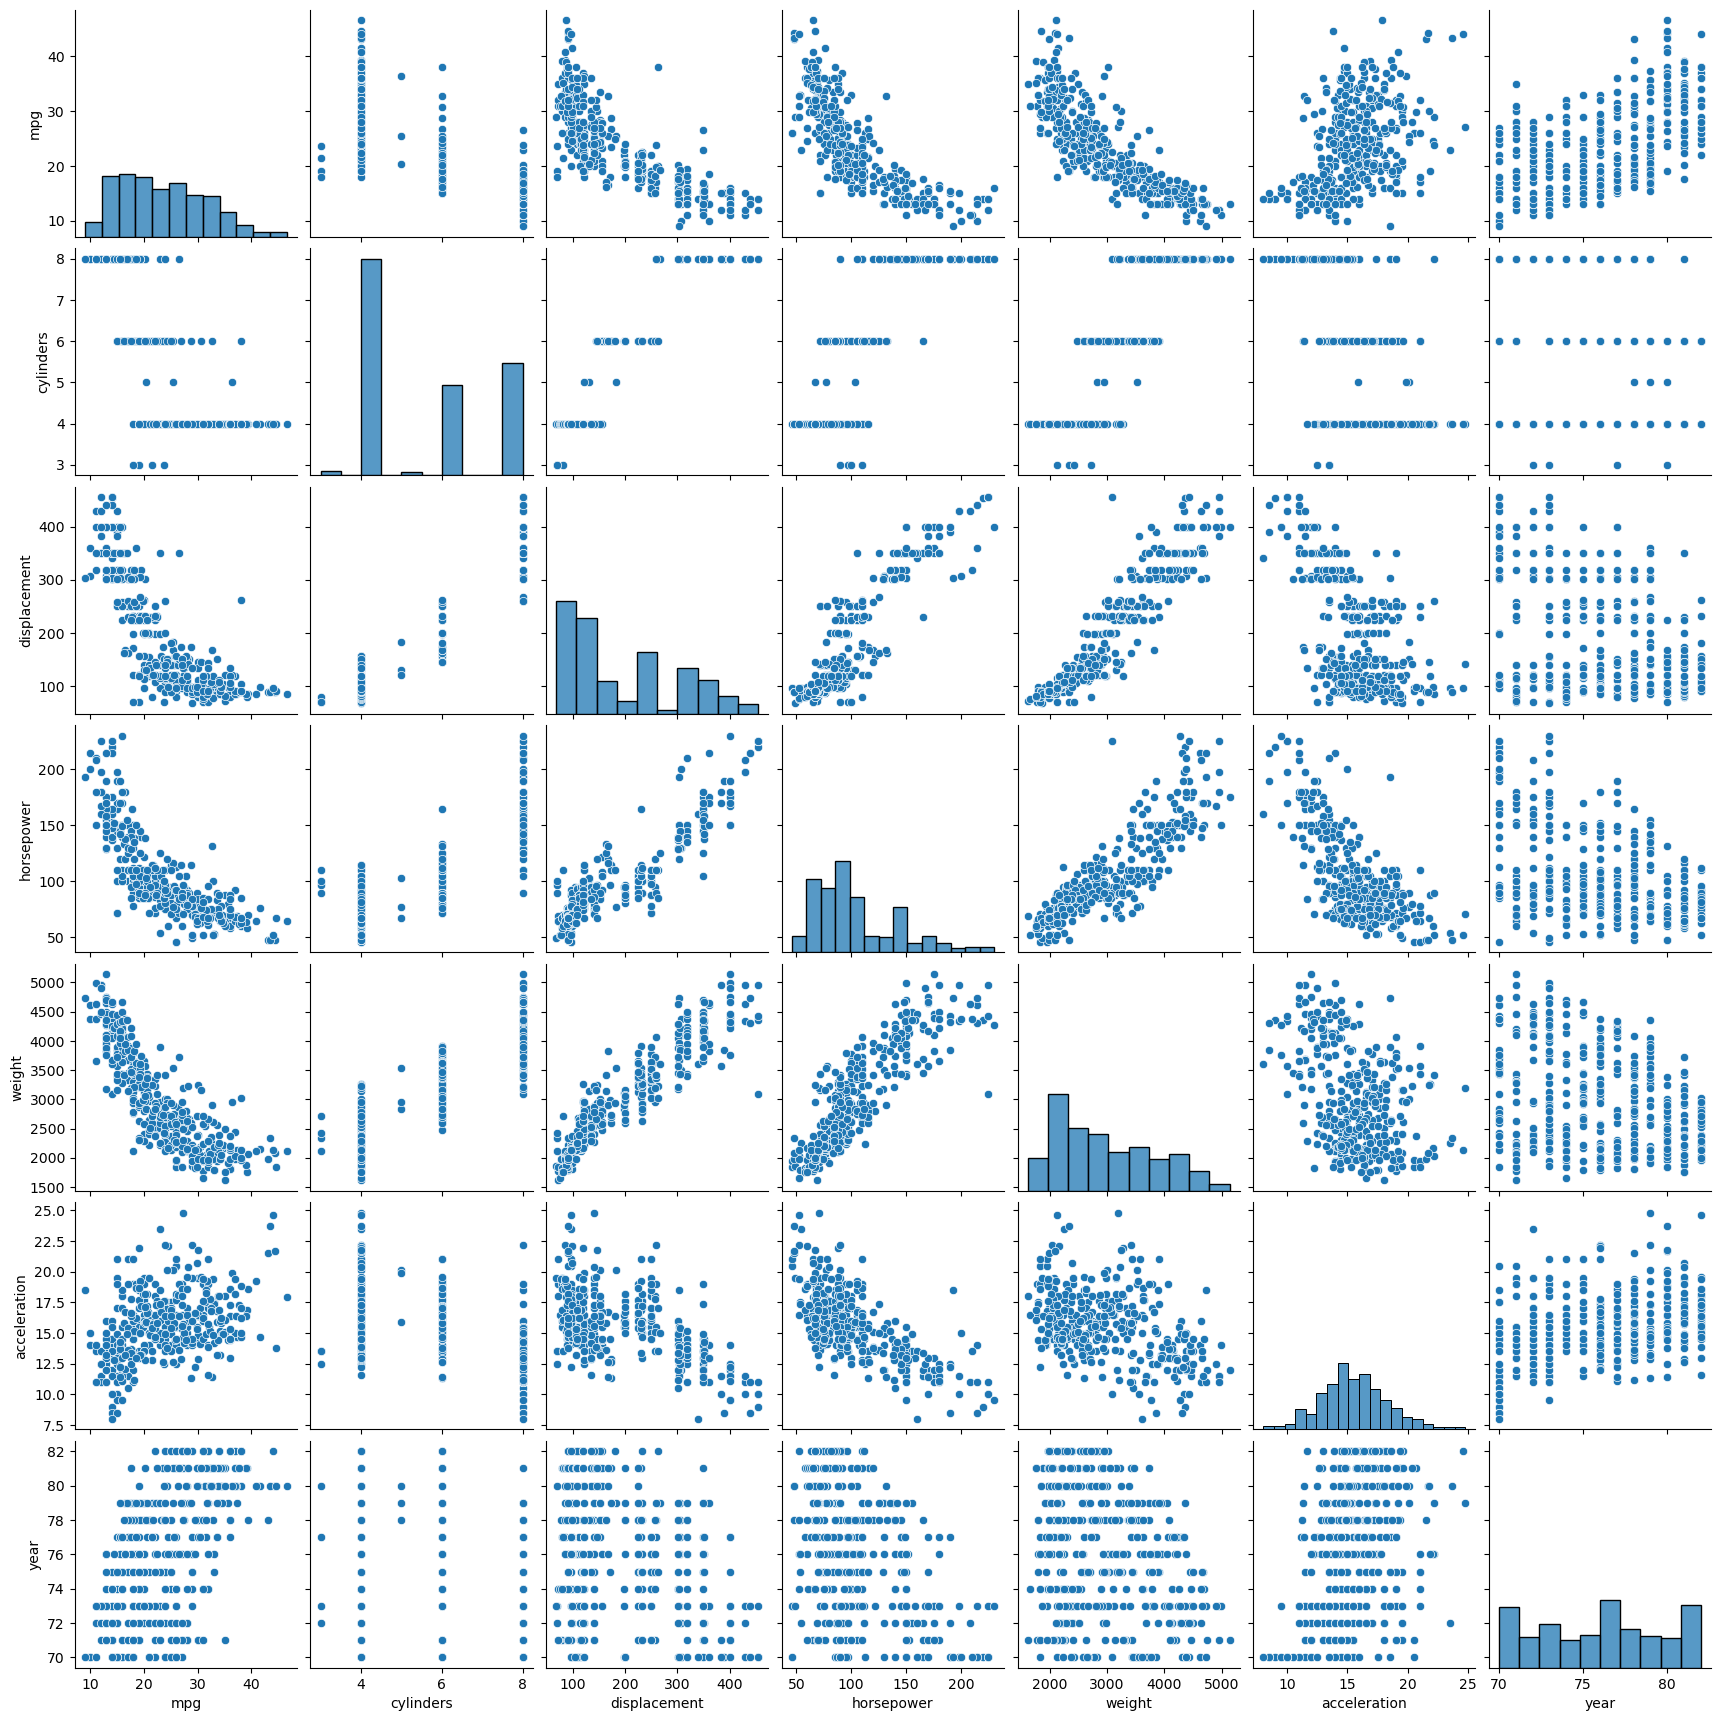

In [38]:
df = pd.read_csv('Auto.csv', na_values='?').dropna()

df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
quantitative_features = ['mpg','cylinders','displacement','horsepower','weight','acceleration','year']
sns.pairplot(df[quantitative_features], diag_kind='hist')  
plt.show()

In [39]:
# b)
corr = df.select_dtypes(include='number').corr()
print(corr)

# mpg is most negatively correlated with weight (–0.83), displacement (–0.81), horsepower (–0.78) and cylinders (–0.78)
# year and origin are positively correlated with mpg (~0.58 and 0.57)
# Many predictors are highly inter-correlated (e.g. displacement–weight = 0.93)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

In [ ]:
# (c Multiple linear regression via formula
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
model = smf.ols(formula, data=df).fit()
print(model.summary())

# i) overall (ANOVA) p < 0.001, so the predictors as a set have a highly significant relationship with mpg.
# ii) non-significant: cylinders (p ≈ 0.14) once the other variables are in the model, significant coeffs: displacentment (positive), horsepower (negative), weight (negative), acceleration (positive), year (positive), origin (positive)
# iii) suggests that each newer model year is worth about +0.79 mpg on average, holding everything else constant.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 03 Jul 2025   Prob (F-statistic):          2.04e-139
Time:                        22:22:57   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [41]:
print("ANOVA results:\n", anova_lm(model))

# p < 0.001, so the predictors as a set have a highly significant relationship with mpg.
# significant coefficients: displacement, horsepower, weight, acceleration, year, origin
# non-significant: cylinders



ANOVA results:
                  df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


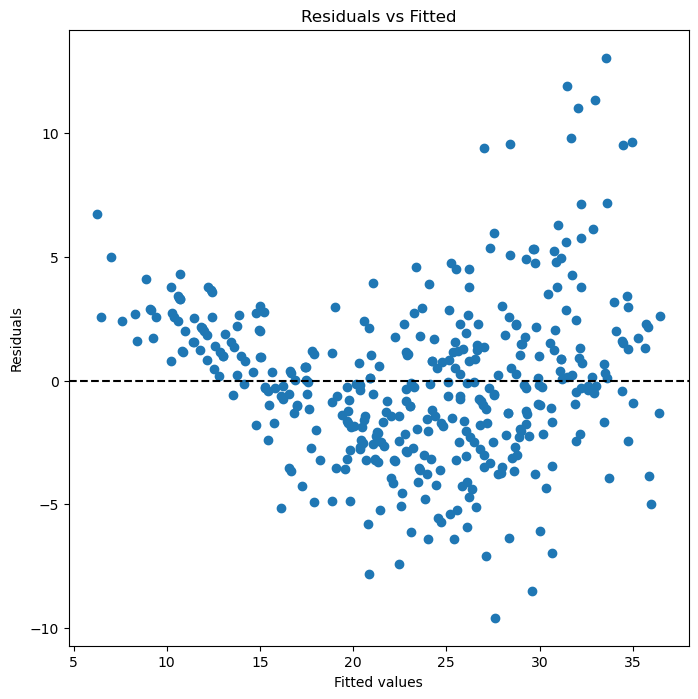

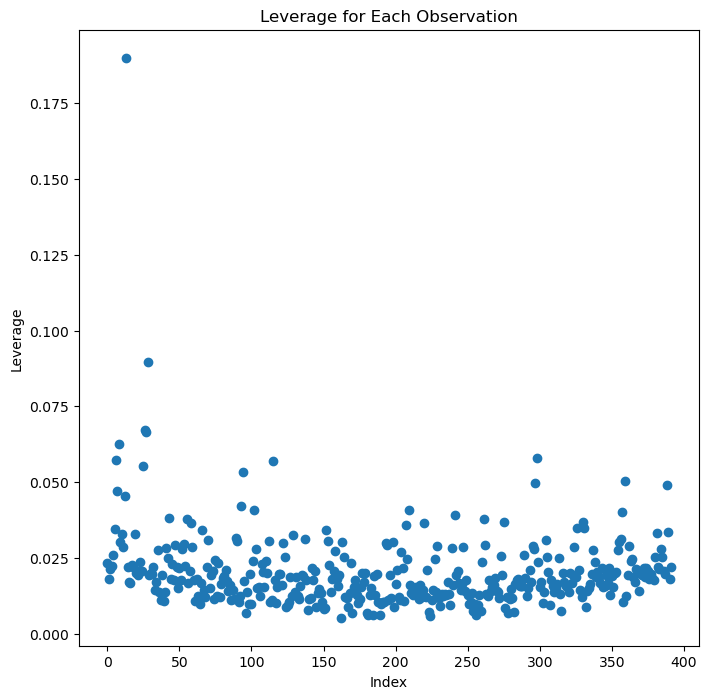

Highest-leverage observation index: 13


In [ ]:
# d)

influence = model.get_influence()
fitted = model.fittedvalues
resid = model.resid
hat = influence.hat_matrix_diag

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(fitted, resid)
ax.axhline(0, color='k', ls='--')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted')
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(np.arange(len(hat)), hat)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.set_title('Leverage for Each Observation')
plt.show()

print("Highest-leverage observation index:", np.argmax(hat))

# Residuals vs. Fitted: there’s a slight “funnel” shape (residuals fan out at larger fitted mpg) and a hint of curvature suggesting non-linearity. However, there aren’t any single points with residuals far beyond ±10 mpg, so no extreme outliers
# Leverage plot: Those high-leverage points could unduly pull the regression fit.


In [ ]:
# e)

model_int = smf.ols('mpg ~ cylinders*displacement + weight + horsepower + acceleration + year + origin', data=df).fit()
print(model_int.summary())

# Adding a cylinders*displacement term yields a positive interaction coefficient but its p-value is ≈ 0.21, so not statistically significant at the 5% level
# log(weight) remains highly significant (p < 0.001) and linearizes the weight–mpg relationship a bit.
# sqrt(acceleration) is also significant (p ≈ 0.02)


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     264.1
Date:                Thu, 03 Jul 2025   Prob (F-statistic):          9.73e-151
Time:                        22:22:58   Log-Likelihood:                -993.83
No. Observations:                 392   AIC:                             2006.
Df Residuals:                     383   BIC:                             2041.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2

In [44]:
# f)

model_tr = smf.ols('mpg ~ np.log(weight) + np.sqrt(acceleration) + horsepower + year + origin + cylinders + displacement', data=df).fit()
print(model_tr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     300.2
Date:                Thu, 03 Jul 2025   Prob (F-statistic):          1.90e-151
Time:                        22:22:58   Log-Likelihood:                -995.12
No. Observations:                 392   AIC:                             2006.
Df Residuals:                     384   BIC:                             2038.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               130.62